Import library

In [60]:
import os
import time
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

Read file cvs

In [61]:
url = "https://raw.githubusercontent.com/Veicap/MachineLearningAssignment/refs/heads/main/uncleandata.csv"
df = pd.read_csv(url)

In [62]:
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                 157.0   
1                0.80             0.86               5                 262.0   
2                0.11             0.88               7                 272.0   
3                0.72             0.87               5                 223.0   
4                0.37             0.52               2                   NaN   

   time_spend_company  work_accident left  promotion_last_5years is_smoker  \
0                 3.0              0  yes                      0       NaN   
1                 6.0              0  yes                      0       yes   
2                 4.0              0  yes                      0       NaN   
3                 5.0              0  yes                      0       NaN   
4                 NaN              0  yes                      0        no   

  department  salary  
0      sales     low  
1   

Question 1: How many rows are there ?

In [63]:
num_rows = len(df)
print(f"number of rows is: {num_rows}")

number of rows is: 15099


Question 2: How many columns are there ? What are they ?

In [64]:
num_columns = len(df.columns)
columns_name = df.columns.tolist()
print(f"number of columns is: {num_columns}")
print("Name of each column is: ")
for col in columns_name:
    print(f"- {col}")

number of columns is: 11
Name of each column is: 
- satisfaction_level
- last_evaluation
- number_project
- average_montly_hours
- time_spend_company
- work_accident
- left
- promotion_last_5years
- is_smoker
- department
- salary


Question 3: How many features? What are they ?

In [65]:
num_features = len(df.columns)
feature_names = df.columns.tolist()
print(f"number of features is: {num_features}")
print("Name of each feature is: ")
for feature in feature_names:
    print(f"- {feature}")

number of features is: 11
Name of each feature is: 
- satisfaction_level
- last_evaluation
- number_project
- average_montly_hours
- time_spend_company
- work_accident
- left
- promotion_last_5years
- is_smoker
- department
- salary


Question 4: How many duplicates if any ?

In [66]:
num_duplicates = df.duplicated().sum()
print(f"number of duplicates is: {num_duplicates}")

number of duplicates is: 2840


Question 5: Remove duplicates if there are any.

In [67]:
df = df.drop_duplicates()
test = df.duplicated().sum()
print(f"number of duplicates is: {test}")

number of duplicates is: 0


Question 6: Print the distributions of each features. What do you see ?

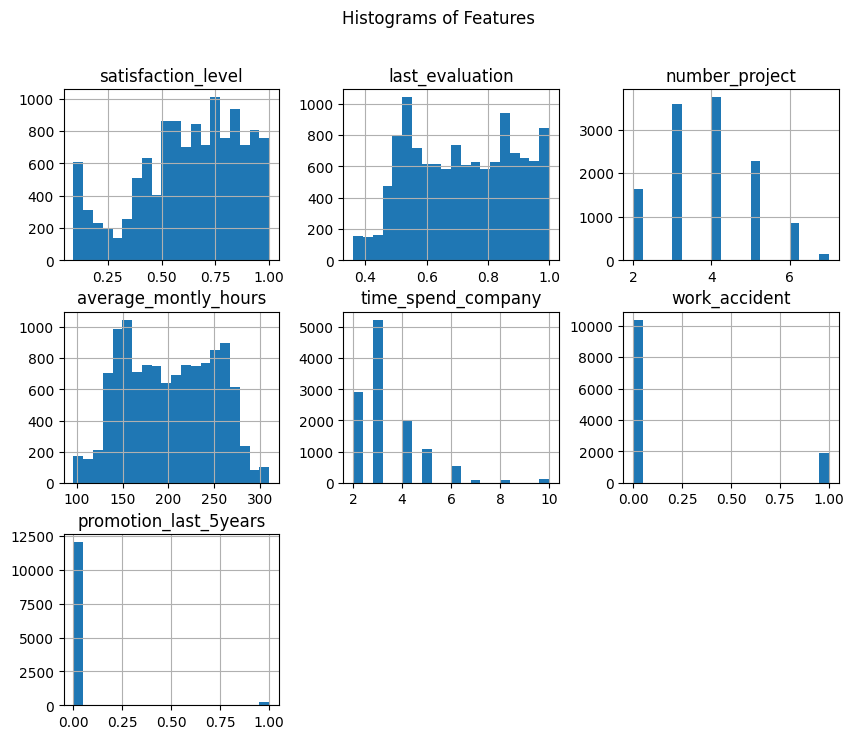

Distribution for left:
left
no     10144
yes     2115
Name: count, dtype: int64
--------------------------------------------------
Distribution for is_smoker:
is_smoker
no     180
yes     55
Name: count, dtype: int64
--------------------------------------------------
Distribution for department:
department
sales          3321
technical      2282
support        1861
IT              998
product_mng     704
RandD           698
marketing       690
accounting      629
hr              611
management      465
Name: count, dtype: int64
--------------------------------------------------
Distribution for salary:
salary
low       5872
medium    5360
high      1027
Name: count, dtype: int64
--------------------------------------------------


In [68]:
# Plot histograms for all columns with numerical data types
df.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()
# Check the distribution for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Distribution for {column}:")
    print(df[column].value_counts())
    print("-" * 50)

Question 7: How many missing values are there ? What features have missing values ?

In [69]:
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print("\nFeatures with missing values:")
print(columns_with_missing_values)

total_missing = missing_values.sum()
print(f"\nTotal number of missing values in the DataFrame: {total_missing}")

Number of missing values in each column:
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         150
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                12024
department                   0
salary                       0
dtype: int64

Features with missing values:
['average_montly_hours', 'time_spend_company', 'is_smoker']

Total number of missing values in the DataFrame: 12542


Question 8: Drop the features with largest number of missing values and fill up the rest of the features with missing values with mean. Can you explain why did we drop the feature with largest portion of missing values in this case ?

In [70]:
missing_values = df.isnull().sum()
column_with_max_missing = missing_values.idxmax() 
df.drop(columns=[column_with_max_missing], inplace=True)
mean_values = df.select_dtypes(include=['float64', 'int64']).mean()
df.fillna(mean_values, inplace=True)
print(f"Feature '{column_with_max_missing}' has been dropped due to having the largest number of missing values.")


Feature 'is_smoker' has been dropped due to having the largest number of missing values.


In this case, we drop the column with the largest number of missing values because:

1. Poor data quality: A column with too many missing values may not provide much useful information. If a column has too many missing values, it may no longer be valuable for accurate analysis or modeling.
2. Impact on the model: Keeping a column with a large number of missing values can reduce the effectiveness of the model or analysis. This is especially important when there is a significant amount of missing data, as the model may not be able to learn much from that column.
3. A reasonable alternative: Dropping this column helps reduce complexity and allows us to focus on columns with more complete data.

Question 9:  Show that there are no missing values in the data at this point.

In [71]:
print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


Question 10: Feature "left" has values 'yes' and 'no'. Convert those values into integer values, 1 and 0.

In [73]:
df['left'] = df['left'].replace({'yes': 1, 'no': 0})
print(df['left'].head())

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64


Question 11: Save the resulting data into a file.

In [74]:
output_file_path = 'clean_data_file.csv' 
df.to_csv(output_file_path, index=False)
print(f"Data has been saved to '{output_file_path}'")

Data has been saved to 'clean_data_file.csv'


Question 13: Divide the data into training set(80%) and test set(20%) and show the number of data points in each by following
1. Uniform sampling
2. Stratified sampling based on the ratio of "yes" and "no" values of feature "left"
3. How would you do the test set and training set sampling and why ?

1. Uniform sampling

In [75]:
X = df.drop('left', axis=1) 
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of data points in the training set (uniform): {len(X_train)}")
print(f"Number of data points in the test set (uniform): {len(X_test)}")

Number of data points in the training set (uniform): 9807
Number of data points in the test set (uniform): 2452


2. Stratified sampling based on the ratio of "yes" and "no" values of feature "left"

In [76]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Number of data points in the training set (stratified): {len(X_train_stratified)}")
print(f"Number of data points in the test set (stratified): {len(X_test_stratified)}")

print(f"Train set class distribution (stratified): \n{y_train_stratified.value_counts(normalize=True)}")
print(f"Test set class distribution (stratified): \n{y_test_stratified.value_counts(normalize=True)}")

Number of data points in the training set (stratified): 9807
Number of data points in the test set (stratified): 2452
Train set class distribution (stratified): 
left
0    0.82747
1    0.17253
Name: proportion, dtype: float64
Test set class distribution (stratified): 
left
0    0.827488
1    0.172512
Name: proportion, dtype: float64


3. How would you do the test set and training set sampling and why ?

I would to use stratified sampling because it the better choice when your dataset has an imbalanced class distribution (e.g., the "yes" and "no" values in the left feature). It ensures that the class proportions are preserved in both the training and test sets, leading to better model performance and evaluation.